In [1]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import *
import sympy as sp
import numpy as np
import unicodedata as uni
import matplotlib.pyplot as plt
from IPython.display import Latex

////////////////// EQUAÇÃO DE FLEXURA PARA PLACAS FINAS: //////////////////

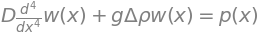

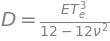

In [2]:
x = sp.symbols('x') #variavel independente em Latex
aux1 = uni.lookup("GREEK CAPITAL LETTER DELTA"); aux2 = uni.lookup("GREEK SMALL LETTER RHO")
D,g,Delta,rho = sp.symbols('D,g,'+aux1+','+aux2)

w = sp.Function('w')(x) #funcao em Latex
p = sp.Function('p')(x)

diffeq = Eq(D*w.diff(x,4)+g*Delta*rho*w,p) #equacao diferencial em Latex
display(diffeq)

aux3 = uni.lookup("GREEK SMALL LETTER NU")
E,T_e,ni = sp.symbols('E,'+'T_e,'+aux3)
Rig = Eq(D,E*T_e**3/(12*(1-ni**2)))
display(Rig)

////////////////// SOLUÇÃO PARA CARGA CONCENTRADA EM x=0 (Linha de carga): //////////////////

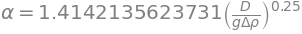

In [4]:
aux4 = uni.lookup("GREEK SMALL LETTER ALPHA")
alp = sp.symbols(aux4)
w_o,v_o = sp.symbols('w_o,'+'v_o,')
sol = Eq(w,w_o*exp(-abs(x)/alp)*(cos(x/alp)+sin(abs(x)/alp)))
display(sol)

wo = Eq(w_o,v_o*alp**3/(8*D))
Alp = Eq(alp,(4*D/(Delta*rho*g))**(1/4))
display(wo,Alp)


////////////////// PARAMETROS DO MODELO //////////////////

In [5]:
rho_m = 3300 #densidade manto kg/m³
rho_h2O = 1000 #densidade agua kg/m³
Te = 50000 #espessura elastica m
Vo = -1.0E13 #linha de carga N/m

g = 10 #aceleracao gravidade m/s²
E = 1.0E11 #modulo de Young em Pa
nu = 0.25 #razao de Poisson

c = 1.0E6 #comprimento do perfil m
dx = 5000 #taxa de amostragem m

////////////////// IMPLEMENTAÇÃO DA SOLUÇÃO //////////////////

In [6]:
npts = int(c/dx + 1) #numero de pontos
x = np.linspace(-c/2,c/2,npts) #vetor com posicoes ao longo do perfil

D = (E*Te**3)/(12*(1-nu**2)) #rigidez flexural

drho = rho_m - rho_h2O #contraste de densidade
alpha = (4*D/(drho*g))**(1/4)
wo = (Vo*alpha**3)/(8*D)

w = wo*np.exp(-np.abs(x)/alpha)*(np.cos(x/alpha)+np.sin(np.abs(x)/alpha)) #flexura para o perfil

////////////////// PLOT DA SOLUÇÃO //////////////////

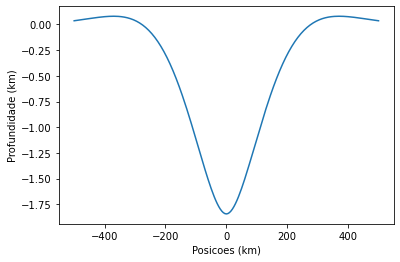

In [7]:
plt.plot(x/1000,w/1000)
plt.ylabel("Profundidade (km)")
plt.xlabel("Posicoes (km)")
plt.show()

////////////////// BORDA LIVRE //////////////////

In [8]:
X = sp.symbols('x')
w = sp.Function('w')(X)
Deltarho = sp.symbols(aux1+aux2)
alp = sp.symbols(aux4)
w_o,v_o,G = sp.symbols('w_o,'+'v_o,'+'g,')

sol = Eq(w,2*v_o/w_o*exp(-X/alp)*cos(X/alp))
display(sol)

wo = Eq(w_o,G*alp*(Deltarho))
display(wo)

In [9]:
x = np.linspace(0,c,npts)

wo = g*drho*alpha

w = 2*Vo*np.exp(-x/alpha)*np.cos(x/alpha)/wo #flexura para o perfil

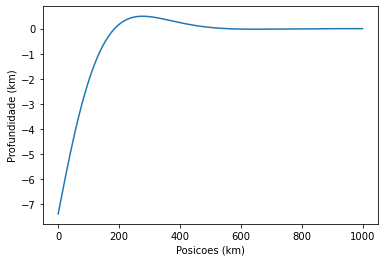

In [10]:
plt.plot(x/1000,w/1000)
plt.ylabel("Profundidade (km)")
plt.xlabel("Posicoes (km)")
plt.show()

In [34]:
c2 =2400000 # Comprimento Bacia Paraná NW-SE
x = np.linspace(0,c2,npts)

rho_s = 2100;  #kg/m³ rho_h2O rho_m
rho_b = 2800 #basalto

d_1 = rho_s - rho_h2O; d_2 = rho_m - rho_b

h = 650 #espessura média basalto
lbda = c2 # km
k = 2*np.pi/lbda

w = (d_1*h*g*np.cos(k*x))/((d_2*g)+D*k**4)

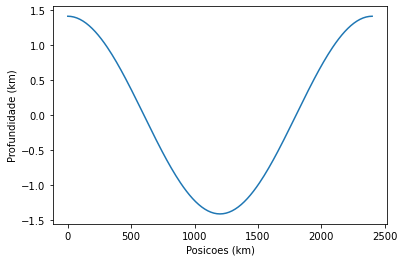

In [35]:
plt.plot(x/1000,w/1000)
plt.ylabel("Profundidade (km)")
plt.xlabel("Posicoes (km)")
plt.show()